In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

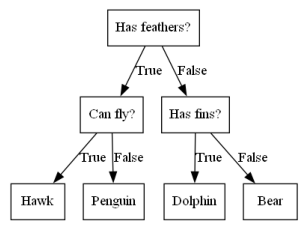

In [2]:
mglearn.plots.plot_animal_tree()

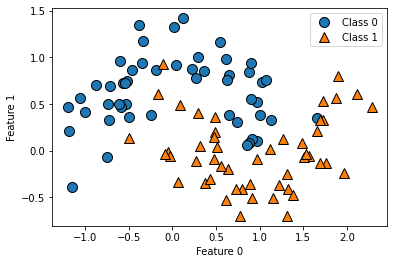

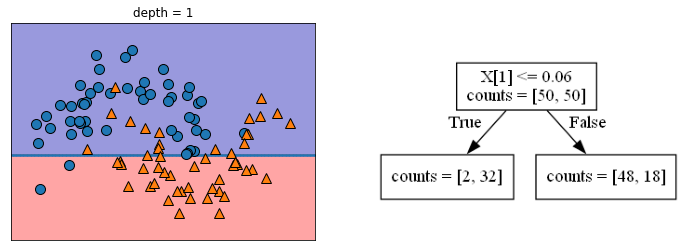

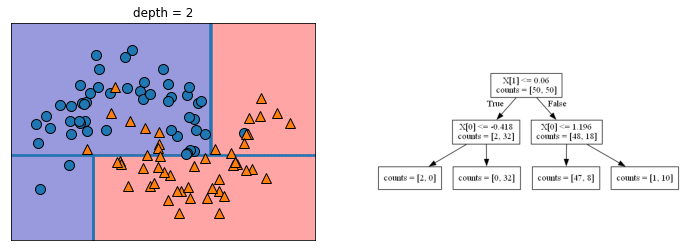

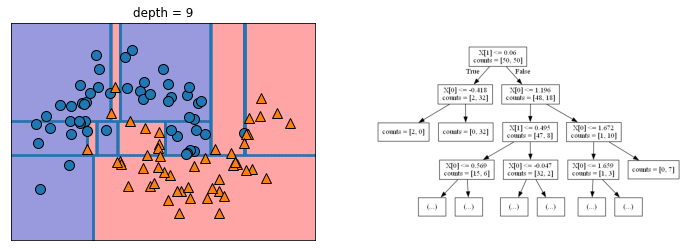

In [3]:
mglearn.plots.plot_tree_progressive()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


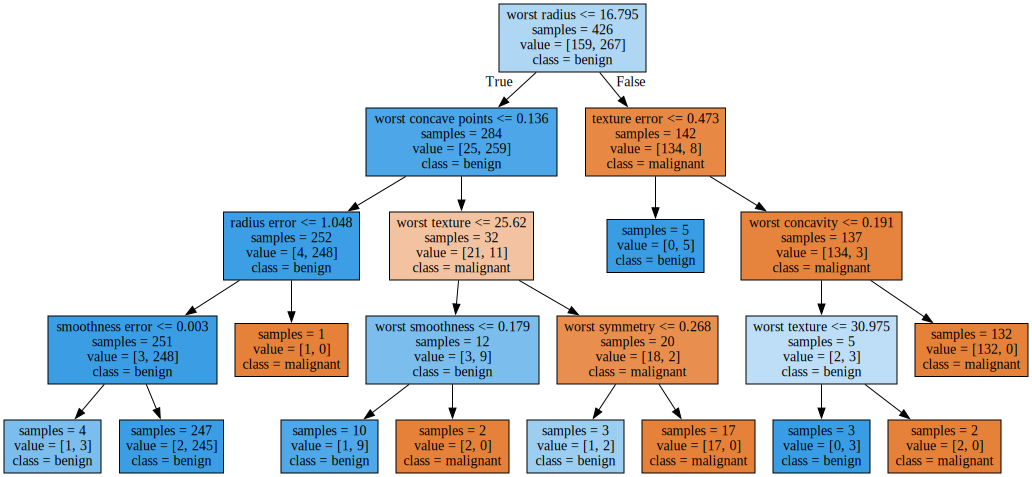

In [6]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [7]:
print("Feature importances:")
print(tree.feature_importances_)


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


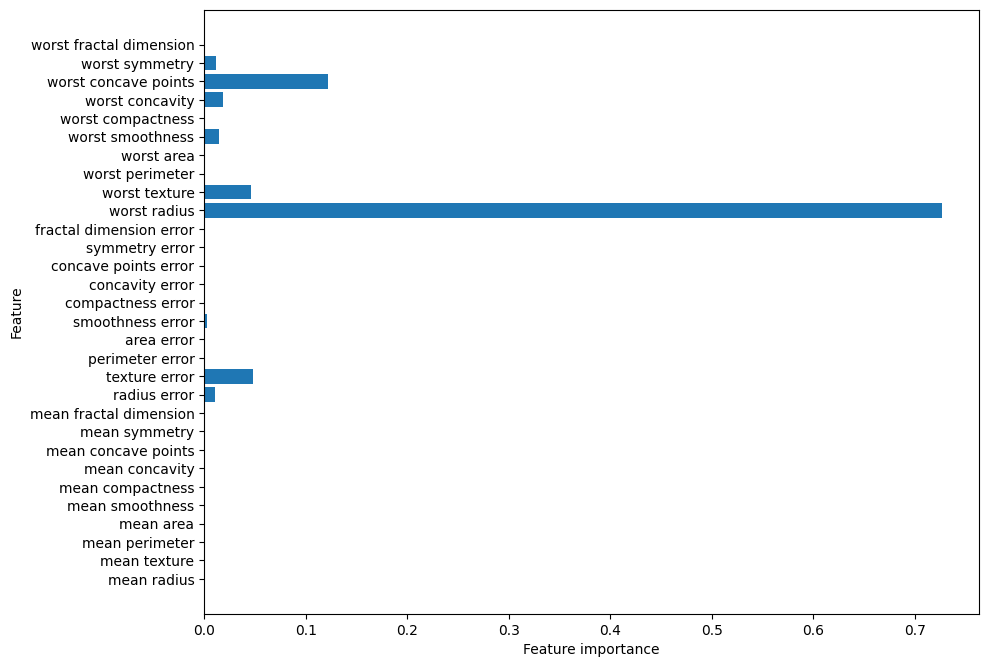

In [8]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10, 8), dpi=100)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


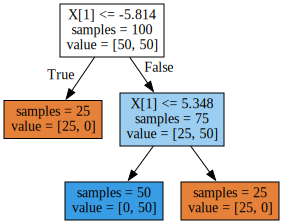

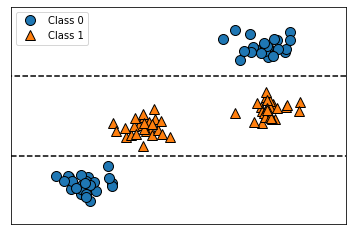

In [9]:
display(mglearn.plots.plot_tree_not_monotone())

# Exercice 1

In [10]:
peng = pd.read_csv("penguins_classification.csv")
display(peng.head(2))

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie


In [11]:
print(peng.columns)
features = ['Culmen Length (mm)', 'Culmen Depth (mm)']
X_train, X_test, y_train, y_test = train_test_split(peng[features], peng["Species"], random_state=0, test_size=.2)

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Species'], dtype='object')


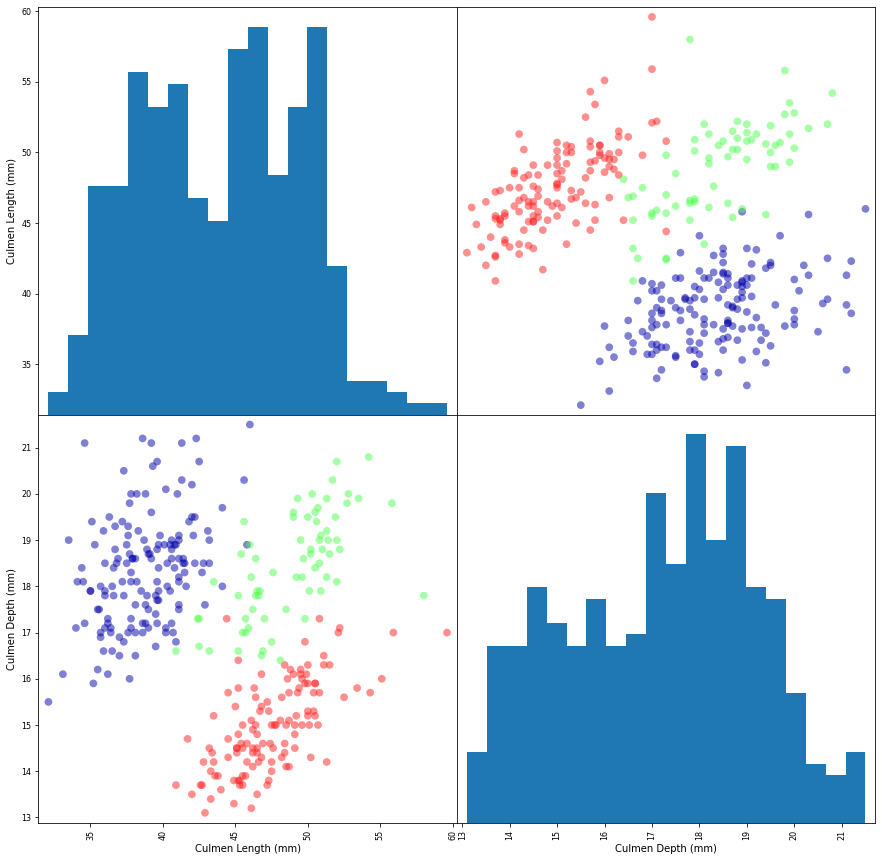

In [12]:
color = peng["Species"].copy()
for c, p in zip(mglearn.cm3.colors, peng["Species"].unique()):
    color = color.replace(p, c)

_ = pd.plotting.scatter_matrix(peng, color=color, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60)

Accuracy on training set: 0.923
Accuracy on test set: 0.986


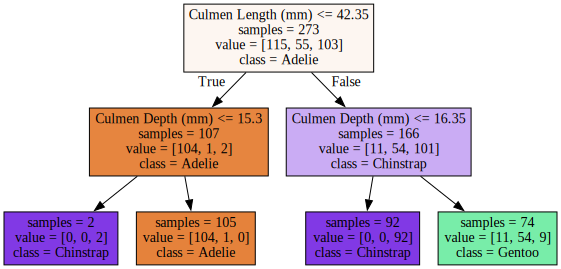

In [13]:
tree = DecisionTreeClassifier(random_state=0, max_depth=2)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

export_graphviz(tree, out_file="peng_tree.dot", class_names=peng["Species"].unique(), feature_names=features, impurity=False, filled=True)

with open("peng_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



# Exercice 2

In [14]:
# Load the iris dataset
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

#print the name of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
df_X = pd.DataFrame(X, columns=iris.feature_names)

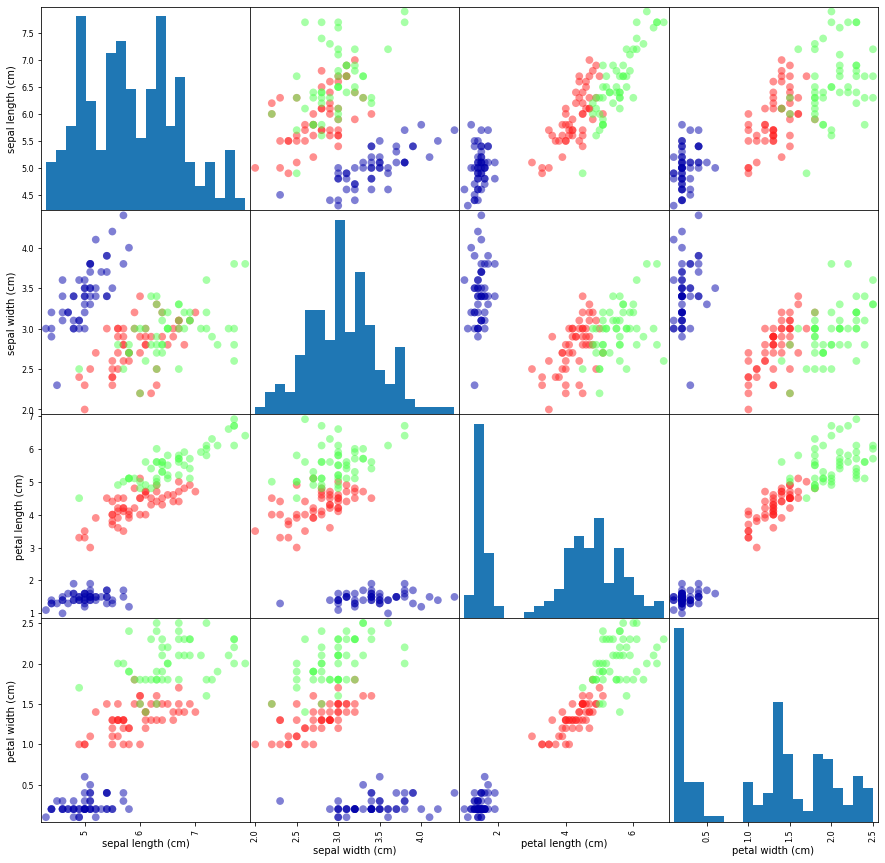

In [16]:
color = pd.Series(y)
for c, p in zip(mglearn.cm3.colors, color.unique()):
    color = color.replace(p, c)

_ = pd.plotting.scatter_matrix(df_X, color=color, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60)

In [17]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2)

tree = DecisionTreeClassifier(random_state=0, max_depth=2)
knn = KNeighborsClassifier(n_neighbors=5)

print(f"Cross validation score for 5 neighbors, knn: {np.mean(cross_val_score(knn, X_train, y_train, cv=5)):.3f}")
print(f"Cross validation score for 2 depths decision tree: {np.mean(cross_val_score(tree, X_train, y_train, cv=5)):.3f}")

Cross validation score for 5 neighbors, knn: 0.933
Cross validation score for 2 depths decision tree: 0.942


Cross validation score for 1 neighbors, knn: 0.942
Cross validation score for 1 depths decision tree: 0.692
Cross validation score for 2 neighbors, knn: 0.925
Cross validation score for 2 depths decision tree: 0.942
Cross validation score for 3 neighbors, knn: 0.925
Cross validation score for 3 depths decision tree: 0.933
Cross validation score for 4 neighbors, knn: 0.925
Cross validation score for 4 depths decision tree: 0.933
Cross validation score for 5 neighbors, knn: 0.933
Cross validation score for 5 depths decision tree: 0.942
Cross validation score for 6 neighbors, knn: 0.942
Cross validation score for 6 depths decision tree: 0.942
Cross validation score for 7 neighbors, knn: 0.950
Cross validation score for 7 depths decision tree: 0.942
Cross validation score for 8 neighbors, knn: 0.958
Cross validation score for 8 depths decision tree: 0.942
Cross validation score for 9 neighbors, knn: 0.958
Cross validation score for 9 depths decision tree: 0.942


c:\Users\leovi\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


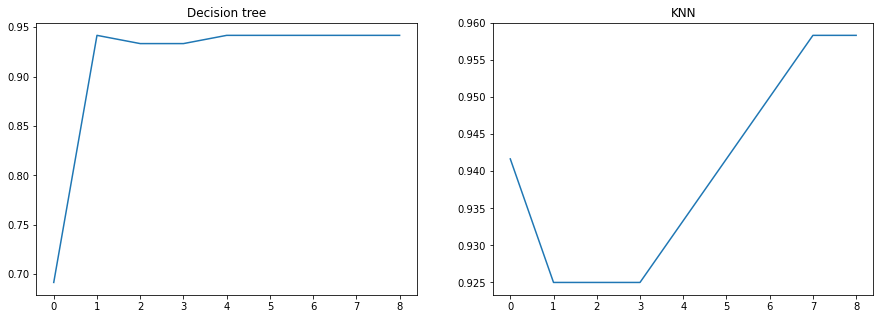

In [18]:
t, k = [], []
for i in range(1, 10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=i)
    knn = KNeighborsClassifier(n_neighbors=i)
    t.append(np.mean(cross_val_score(tree, X_train, y_train, cv=5)))
    k.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    print(f"Cross validation score for {i} neighbors, knn: {k[-1]:.3f}")
    print(f"Cross validation score for {i} depths decision tree: {t[-1]:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(t)
ax[0].set_title("Decision tree")
ax[1].plot(k)
ax[1].set_title("KNN")
fig.show()

# 5. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

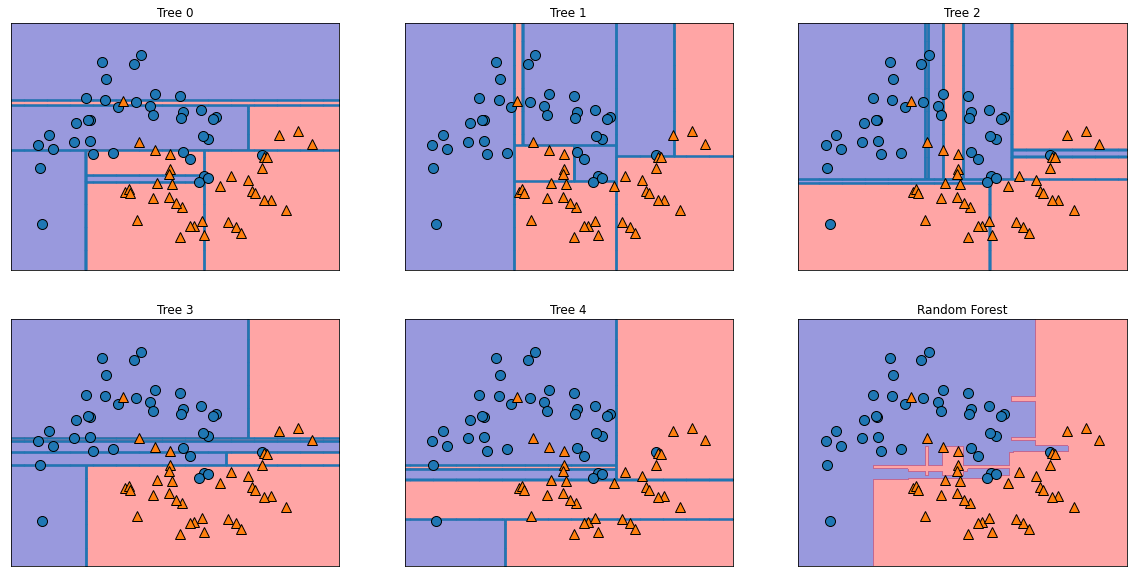

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
_ = mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


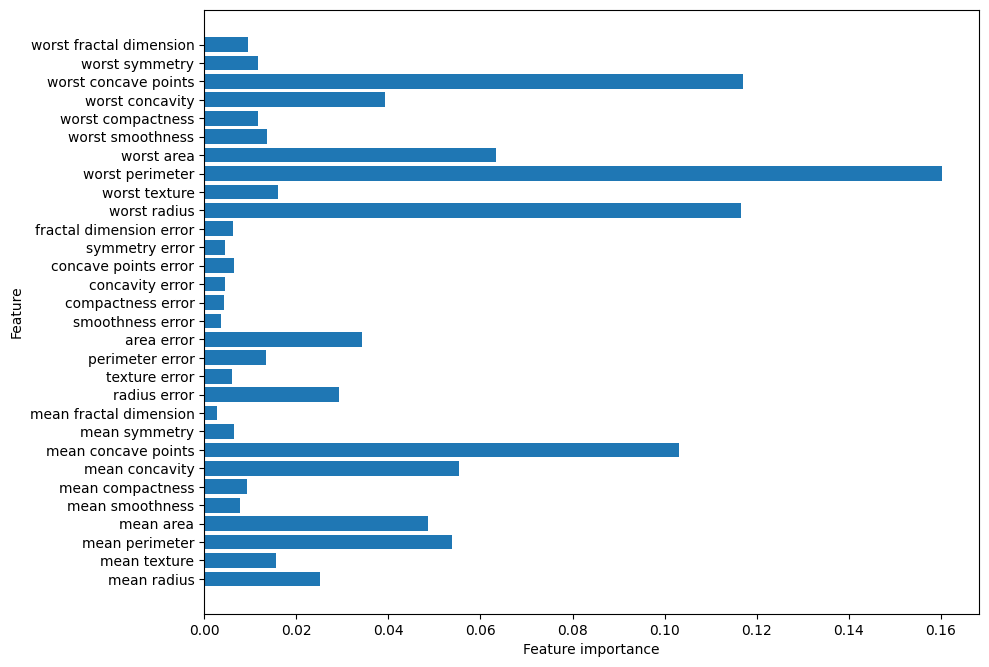

In [22]:
plot_feature_importances_cancer(forest)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
forest = RandomForestClassifier(n_estimators=5, random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=3)

In [24]:
# show accuracy of each tree
for i, tree in enumerate(forest.estimators_):
    s = tree.score(X_test, y_test)
    print(f"Tree {i} accuracy: {s:.3f}")

print(f"Random forest accuracy: {forest.score(X_test, y_test):.3f}")

Tree 0 accuracy: 0.947
Tree 1 accuracy: 0.974
Tree 2 accuracy: 0.895
Tree 3 accuracy: 0.895
Tree 4 accuracy: 0.895
Random forest accuracy: 0.947


# 6. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

c:\Users\leovi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\Users\leovi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


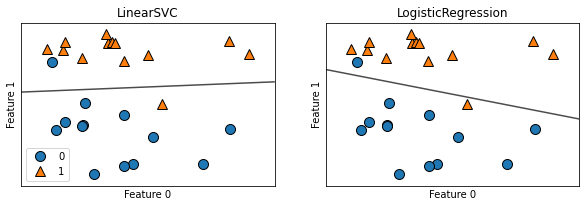

In [26]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression(max_iter=3000)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


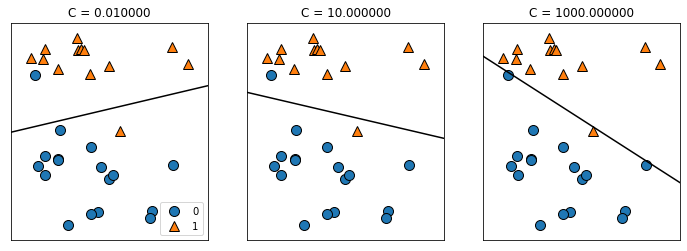

In [27]:
mglearn.plots.plot_linear_svc_regularization()

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [29]:
logreg100 = LogisticRegression(C=100, max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


Training set score: 0.981
Test set score: 0.965


c:\Users\leovi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Exercice 6.1

In [30]:
logreg001 = LogisticRegression(C=.001, max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.944


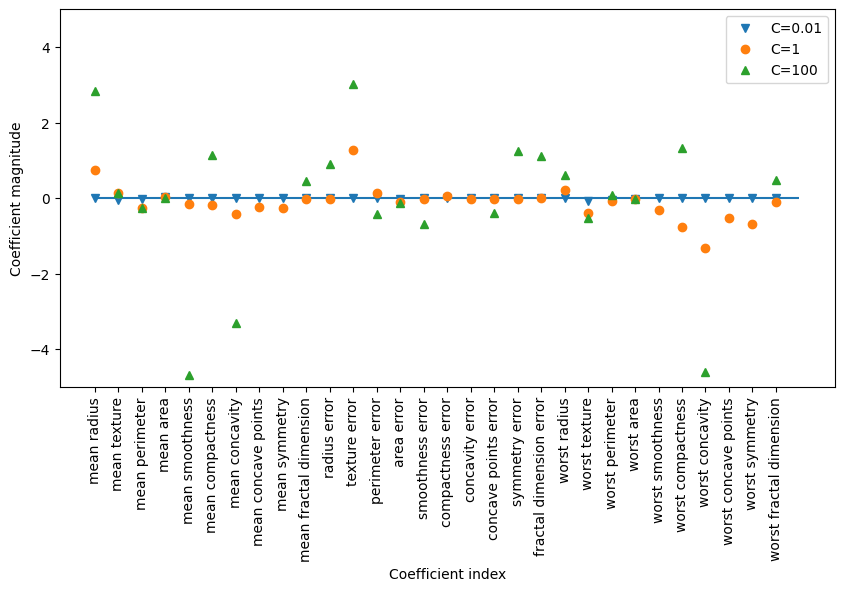

In [31]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

	Training accuracy of l1 logreg with C=0.001: 0.953
Test accuracy of l1 logreg with C=0.001: 0.944
	Training accuracy of l1 logreg with C=1: 0.958
Test accuracy of l1 logreg with C=1: 0.958
	Training accuracy of l1 logreg with C=100: 0.981
Test accuracy of l1 logreg with C=100: 0.965


c:\Users\leovi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


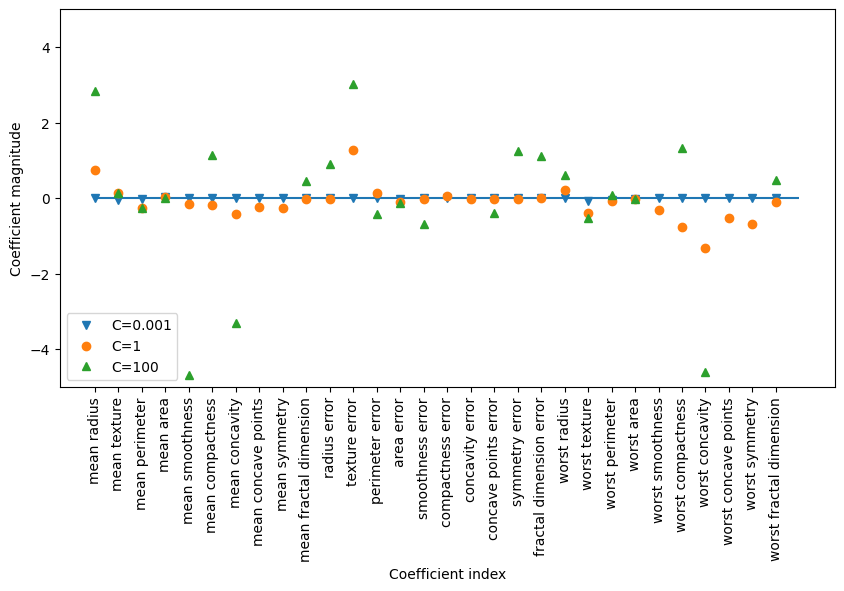

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
plt.figure(figsize=(10, 5), dpi=100)
for C, marker in zip([0.001, 1, 100], ['v', 'o', '^']):
    lr_l1 = LogisticRegression(C=C, penalty='l2', max_iter=3000).fit(X_train, y_train)
    print("\tTraining accuracy of l1 logreg with C={}: {:.3f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={}: {:.3f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

## Exercice 6.2

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

for C, marker in zip([0.001, 1, 100], ['v', 'o', '^']):
    lr_l1 = LogisticRegression(C=C, penalty='l2', max_iter=3000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={}: {:.3f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={}: {:.3f}".format(C, lr_l1.score(X_test, y_test)))

# On peut pas tracer le graphes comme au dessus car il y a 3 classes et 4 features (faudrait 3 graphes en fait pour reproduire le truc au dessus)


Training accuracy of l1 logreg with C=0.001: 0.696
Test accuracy of l1 logreg with C=0.001: 0.579
Training accuracy of l1 logreg with C=1: 0.982
Test accuracy of l1 logreg with C=1: 0.974
Training accuracy of l1 logreg with C=100: 0.991
Test accuracy of l1 logreg with C=100: 0.974


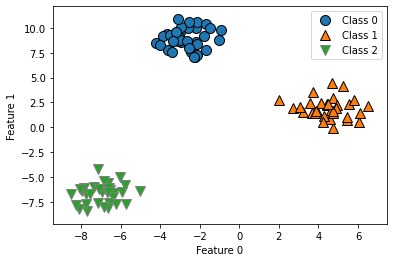

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [35]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


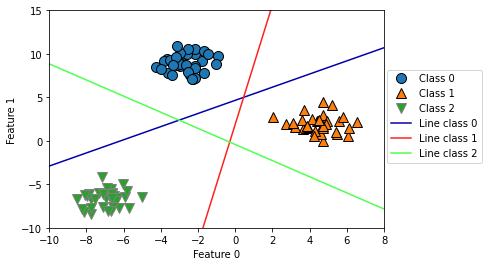

In [36]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))


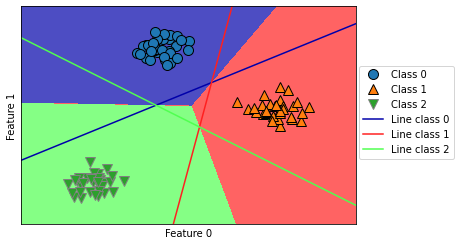

In [38]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()